<a href="https://colab.research.google.com/github/alx1056/LinearReg-GradSchool-Predict/blob/main/GradSchoolLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Graduate school prediction using data from Kaggle. 

"https://www.kaggle.com/mohansacharya/graduate-admissions"

In [29]:
#import required libraries

#for data import and basic oprtaion
import pandas as pd
import numpy as np

#for visulization and plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#to create the confusion matrix
from sklearn import metrics

#to split the dataset into train and test
from sklearn.model_selection import train_test_split

#to apply logistic regresison
from sklearn.linear_model import LinearRegression

import missingno as mn

In [79]:
data = pd.read_csv("/content/Admission_Predict.csv")
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [80]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [83]:
data.dropna()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


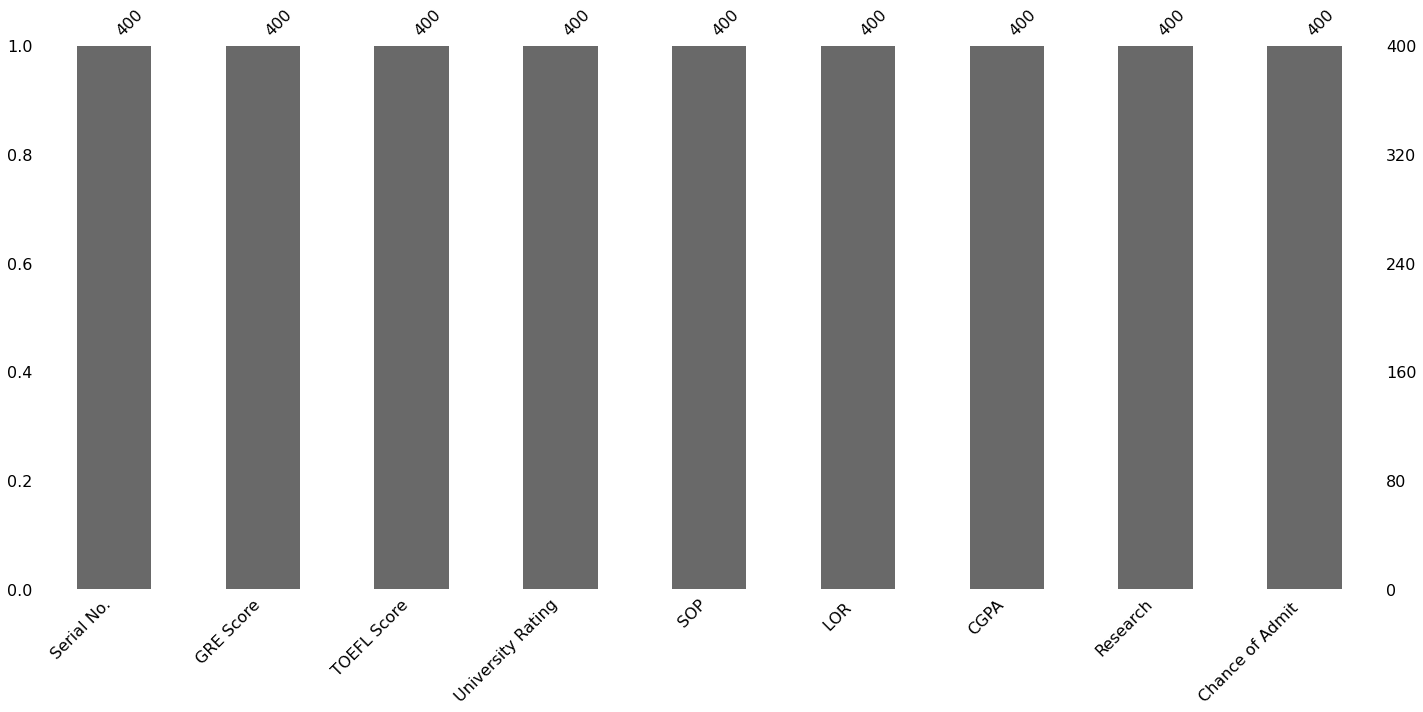

In [58]:
mn.bar(data)

In [74]:
data['Admit'] = data['Admit'].astype(int)
data['SOP'] = data['SOP'].astype(int)
data['LOR '] = data['LOR '].astype(int)
data['CGPA'] = data['CGPA'].astype(int)

# displaying the datatypes 
display(data.dtypes) 

Serial No.           int64
GRE Score            int64
TOEFL Score          int64
University Rating    int64
SOP                  int64
LOR                  int64
CGPA                 int64
Research             int64
Admit                int64
dtype: object

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [86]:
data.rename(columns={'Chance of Admit ':'Admit'}, inplace=True)
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [93]:
feature_cols = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA']
X = data[feature_cols] # Features
y = data['Admit'] # Target variable

In [94]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=0)

print(X_train.shape)
print("\n")
print(X_test.shape)

(280, 6)


(120, 6)


In [95]:
from sklearn.linear_model import LinearRegression
linmodel = LinearRegression()

linmodel.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [183]:
cdf = pd.DataFrame(linmodel.coef_.T,X.columns,columns=['Score Coef'])
cdf

,Score Coef
GRE Score,0.002371
TOEFL Score,0.002261
University Rating,0.003607
SOP,-0.003277
LOR,0.022287
CGPA,0.128694


Holding all other features fixed, a 1 unit increase the features listed above will cause an increase or decrease in admissions predicitons by their associated coeficient value. 

In [134]:
predictions = linmodel.predict(X_test)
print(predictions)

[0.70245122 0.70178021 0.77259072 0.62525942 0.73535244 0.61162262
 0.71861849 0.65074741 0.87523609 0.91897016 0.54363508 0.87961173
 0.72737881 0.46075561 0.84986609 0.63213623 0.61926549 0.81350663
 0.59492561 0.74662217 0.87414484 0.86440826 0.66268521 0.45420271
 0.77511045 0.58689945 0.47513738 0.6513462  0.88480772 0.66421351
 0.62605709 0.7316693  0.72992847 0.56002167 0.79893877 0.76483031
 0.64237288 0.85700053 0.63688633 0.93067429 0.71771552 0.68510628
 0.69918657 0.79947831 0.84666042 0.66693617 0.57137399 0.70160109
 0.61535329 0.60868707 0.68709309 0.79851074 0.63814646 0.87514293
 0.71136026 0.74510295 0.69814213 0.72599051 0.76993028 0.82030428
 0.78817868 0.47342872 0.64769378 0.52494578 0.83279562 0.81590418
 0.72872254 0.86081564 0.78643812 0.74386392 0.60805984 0.82035695
 0.82170269 0.59014197 0.93285012 0.61795894 0.64638938 0.65649194
 0.90747487 0.51530719 0.7392041  0.76639667 0.59661779 0.85863403
 0.60281162 0.7963843  0.66200358 0.72065587 0.80388259 0.8462

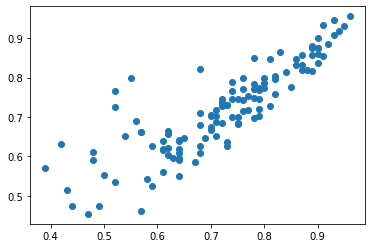

In [135]:
plt.scatter(y_test, predictions) #seems decently correlated

In [178]:
linmodel.fit(X_train, y_train)
print ("Accuracy on training set:")
print (linmodel.score(X_train, y_train))
print ("Accuracy on testing set:")
print (linmodel.score(X_test, y_test))
print("\n")
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Accuracy on training set:
0.8183003757080348
Accuracy on testing set:
0.7390680112472024


MAE: 0.04661401692749137
MSE: 0.004490710195515934
RMSE: 0.06701276143777343


In [187]:
#with a GRE of 300, TOEFL of 150, LOR of 4, SOR of 4, u rank of 4 and Cum GPA of 10
t = [[300,150, 4,4,4,10]]
linmodel.predict(t)
#97% chance of getting in....

array([0.97405407])